1. Defining the Question(s): This is the first and arguably the most important step in the workflow. It involves identifying the problem(s) or question(s) that the analysis aims to answer. This step sets the direction for the entire analysis and ensures that the results are relevant and actionable.

2. Data Collection: Once the question(s) has(have) been defined, the next step is to collect the data needed to answer it(them). This can involve gathering existing data or generating new data through surveys, experiments, or other methods.

3. Data Cleaning and Preparation: After the data has been collected, it needs to be cleaned and prepared for analysis. This involves removing errors, handling missing values, and transforming the data into a suitable format for analysis.

4. Data Analysis: With the data cleaned and prepared, the next step is to analyze it. This involves visualizing and summarizing the data, applying statistical techniques, machine learning algorithms, or other methods to uncover patterns, relationships, and insights in the data.  The analysis should be directly linked back to the question(s) and problem(s) from Part 1 (Logistic Regression, )

5. Interpretation and Reporting: The final step in the workflow is to interpret the results of the analysis and report them in a clear and understandable way. This involves creating visualizations, writing about the interpretation and implication of the findings, and presenting the findings to stakeholders.

6. Contribution Report: Provide a few sentences explaining details on what each group member contributed to the submission.  Per the syllabus, individuals not making a significant contribution to the final project will be at risk of a grade reduction on their individual final project grade.  

### **Data Collection:**
For this project, we use the NBA Shooting Data dataset, which contains shot-level outcomes for four players during the 2021 NBA Playoffs. The unit of observation is a single shot attempt, meaning each row corresponds to one recorded playoff shot taken by one of the selected players. This dataset was obtained from https://www.datacamp.com/datalab/datasets/dataset-python-nba-shooting-data.

The dataset represents a focused subset of postseason performance rather than the entire league, so the population of interest is best described as:
all shot attempts taken by the four selected players during the 2021 NBA Playoffs. Because the dataset is intentionally narrow, conclusions should be framed around these players and this playoff timeframe, rather than generalized to all NBA players or seasons.

Dataset Features and Context

This dataset includes spatial shot location, defensive context, and outcome labels, enabling analyses of shot efficiency by location and potential effects of defender matchups. Variables include:

SHOOTER (string, categorical): Name of the player taking the shot.

X (float, numeric): Horizontal distance from the basket in feet.

Y (float, numeric): Vertical distance from the basket in feet.

RANGE (string, categorical/ordinal): Shot distance band (radius range) from the basket in feet.

DEFENDER (string, categorical): Name of the nearest or primary defender on the shot.

SCORE (string, binary categorical): Shot result, recorded as MADE or MISSED.

Spatial variables (X, Y) are measured in feet and represent shot location relative to the basket. The RANGE variable provides a discretized distance category that complements the continuous coordinates and supports grouped comparisons (e.g., near rim vs. midrange vs. three-point range, depending on how the bins are defined in the dataset). The DEFENDER variable provides matchup-level context that can be used to explore whether shot success rates vary by defending player, though this may require careful handling of small sample sizes.

Collection Procedure (as documented/assumed)

??

Data Quality Considerations

Because this dataset focuses on four players, there may be imbalance in sample sizes across shooters and defenders, as well as across shot ranges. Some defender categories may appear rarely, which can create unstable estimates if used in modeling. Additionally, RANGE depends on how distances were binned, so analyses using RANGE should confirm that these bins are meaningful and consistent with the research question. These considerations are especially important for the resampling components of the project, where bootstrap confidence intervals or permutation tests may be used to quantify uncertainty.

Logistic Regression


## Data Dictionary
|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the basket in ft  |
|Y        |float     |Vertical distance of the shot taken from the basket in ft    |
|RANGE    |String    |Radius range of the shot taken from the basket in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |

In [1]:
import pandas as pd
nba = pd.read_csv("nba_players_shooting.csv", index_col=0)
print(nba.shape)
nba.head(776)


(776, 6)


,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
INDEX,,,,,,
0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE
1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE
2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE
3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE
4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE
...,...,...,...,...,...,...
771,Trae Young,23.952742,15.324875,"(25, 29)",Russell Westbrook,MISSED
772,Trae Young,6.221766,30.756008,"(25, 29)",Seth Curry,MISSED
773,Trae Young,16.397467,27.660323,"(25, 29)",Chris Paul,MISSED


# 2 Analytical Approach
To answer the research question, five exploratory avenues were employed:

- Field Goal Percentage (FG%) by Range and by Defender – to identify general trends in shooting efficiency.
- Scatter Plots of X and Y Coordinates – to visualize spatial shot tendencies and success for each player.
- FG% by Player and Range (Bar Graph) – to compare individual players’ efficiency across different distances.
- FG% vs. Shot Distance (Line Chart) – to analyze shooting efficiency continuously across distances and identify trends or anomalies.
- FG% vs. Defenders (Grouped Bar Chart) – to quantify performance differences in head-to-head matchups.

## Avenue 1: Average Field Goal% By Shooting Ranges and Defenders


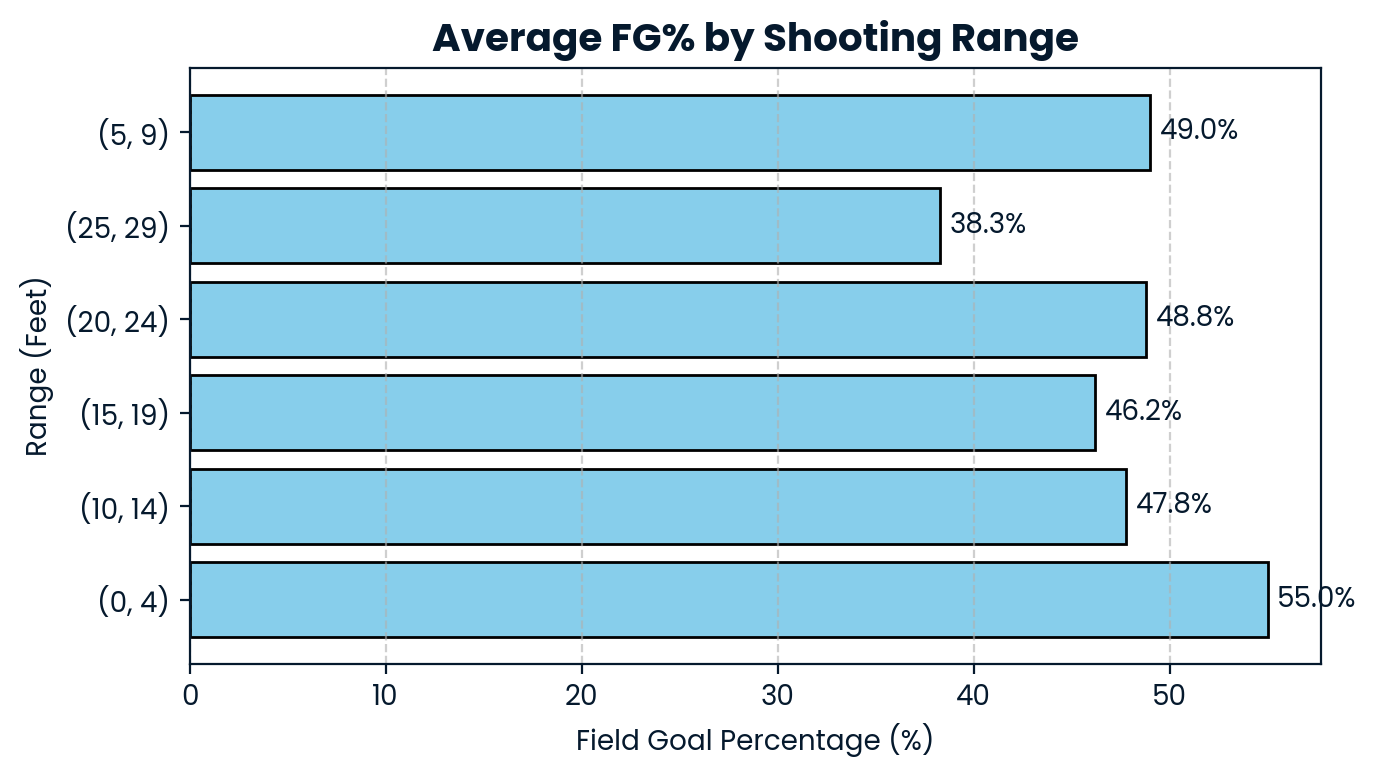

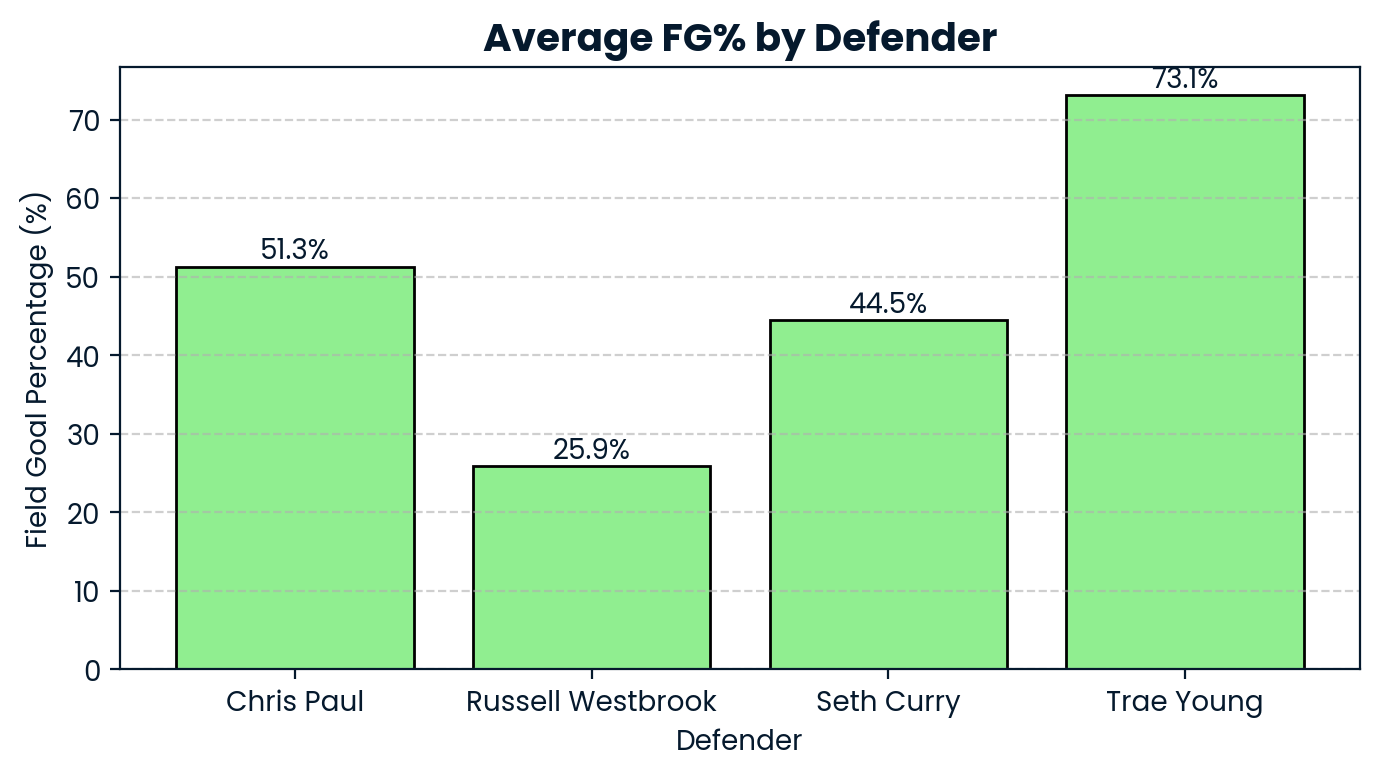

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Data Loading and Setup ---

try:
    nba = pd.read_csv("nba_players_shooting.csv", index_col=0)
except FileNotFoundError:
    print("Error: 'nba_players_shooting.csv' not found. Please ensure the data file is in the correct location.")
    exit()

# Convert MADE/MISSED to numerical flag
nba['MadeFlag'] = nba['SCORE'].apply(lambda x: 1 if x.upper() == 'MADE' else 0)


# --- 2. Mean FG% by Range (Bar Chart) ---

fg_by_range = nba.groupby('RANGE').agg(
    Mean_FG=('MadeFlag', 'mean'),
    Attempts=('MadeFlag', 'count')
).reset_index()
fg_by_range['Mean_FG_Display'] = (fg_by_range['Mean_FG'] * 100).round(1)

# Visualization Choice:
# → **Horizontal Bar Chart** — best for comparing FG% across categorical ranges clearly.
plt.figure(figsize=(7, 4))
bars = plt.barh(fg_by_range['RANGE'], fg_by_range['Mean_FG_Display'], color='skyblue', edgecolor='black')

# Add labels on bars
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%", va='center', fontsize=10)

plt.title("Average FG% by Shooting Range", fontsize=14, fontweight='bold')
plt.xlabel("Field Goal Percentage (%)")
plt.ylabel("Range (Feet)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- 3. Mean FG% by Defender (Vertical Bar Chart) ---

fg_by_defender = nba.groupby('DEFENDER').agg(
    Mean_FG=('MadeFlag', 'mean'),
    Attempts=('MadeFlag', 'count')
).reset_index()
fg_by_defender['Mean_FG_Display'] = (fg_by_defender['Mean_FG'] * 100).round(1)

# Visualization Choice:
# → **Vertical Bar Chart** — great for ranking defenders and highlighting who suppresses shooting most effectively.
plt.figure(figsize=(7, 4))
bars = plt.bar(fg_by_defender['DEFENDER'], fg_by_defender['Mean_FG_Display'],
               color='lightgreen', edgecolor='black')

# Add percentage labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{bar.get_height():.1f}%", ha='center', fontsize=10)

plt.title("Average FG% by Defender", fontsize=14, fontweight='bold')
plt.ylabel("Field Goal Percentage (%)")
plt.xlabel("Defender")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


This analysis examines how external circumstances, specifically shooting distance and the assigned defender, impact a player's field goal percentage (FG%). The dataset focuses on four NBA players: Chris Paul, Russell Westbrook, Seth Curry, and Trae Young during the 2021 Playoffs. Each visualization was selected to isolate and explain these factors, moving from high-level aggregate trends to player-specific comparisons. The first dashboard provides an aggregate view of shooting performance by range and defender. The average FG% by shooting range shows that shots taken within 4 feet of the basket are the most effective (55.0%), reflecting layups and dunks, while shots from the 25–29 foot range are the least effective (38.3%), representing long three-pointers. Mid-range shots (10–24 feet) maintain a relatively consistent efficiency between 46–48%. The average FG% by defender illustrates how players perform under different defensive pressure: players guarded by Russell Westbrook struggled the most, shooting 25.9% on average, whereas those defended by Trae Young were the most successful at 73.1%. Bar charts were chosen as the visualization type because they allow for easy comparison of a quantitative metric (FG%) across discrete categories. Horizontal bars were used for the range chart to accommodate longer categorical labels, while vertical bars were used for the defender chart for intuitive reading of player names. Distinct colors such as light blue for range and light green for defender were applied to visually separate the two analyses, reinforcing that they represent related but distinct dimensions of shooting performance.

## Avenue 2: Spatial Shot Distribution

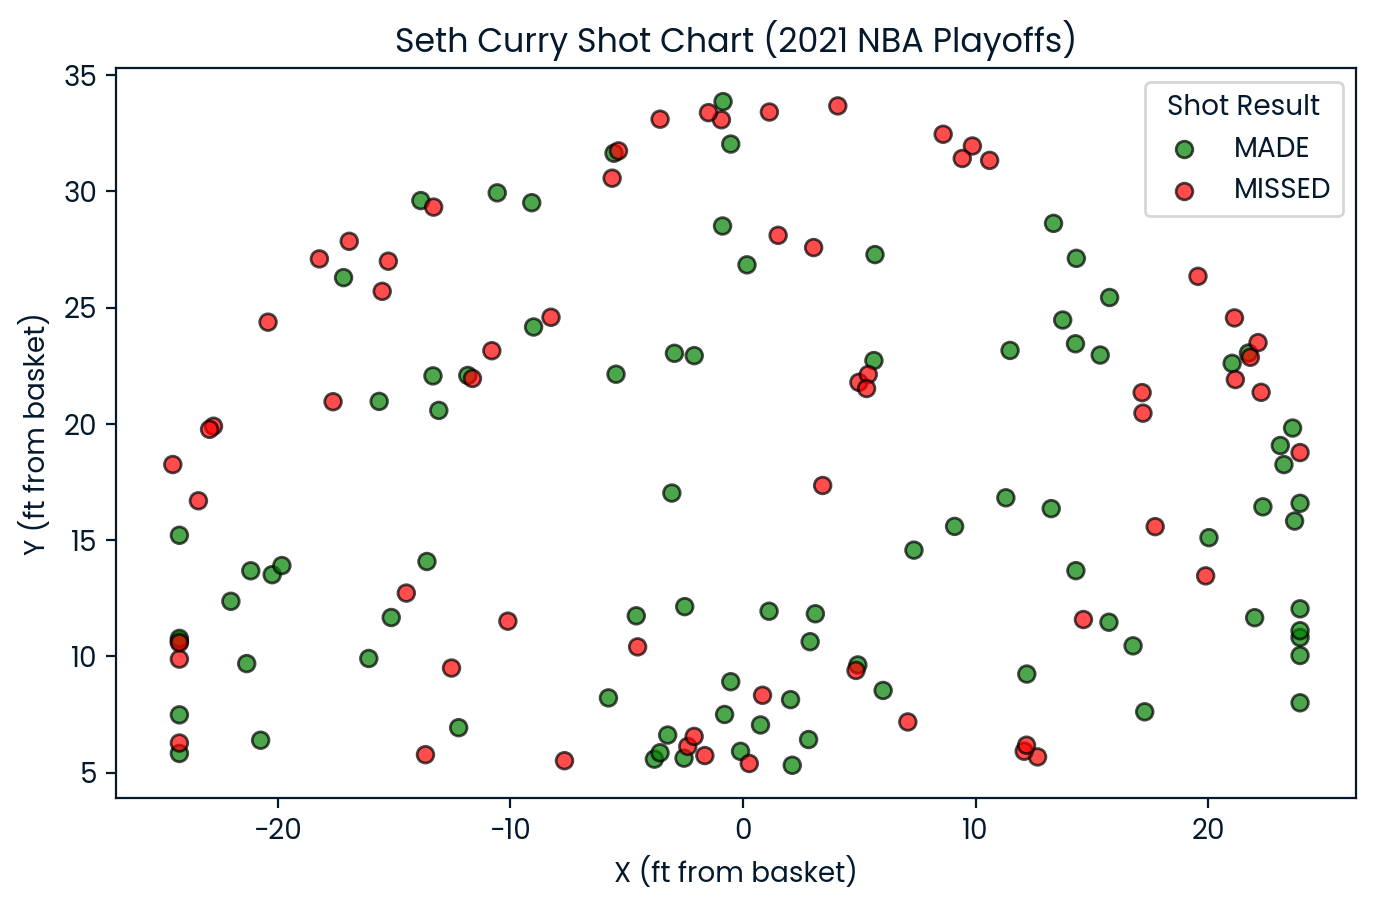

In [4]:
import matplotlib.pyplot as plt

# Filter data for Seth Curry
seth_curry_shots = nba[nba['SHOOTER'] == 'Seth Curry']

# Set color map for 'MADE' and 'MISSED'
color_map = {'MADE': 'green', 'MISSED': 'red'}
colors = seth_curry_shots['SCORE'].map(color_map)

plt.figure(figsize=(8, 7))
plt.scatter(seth_curry_shots['X'], seth_curry_shots['Y'], c=colors, alpha=0.7, edgecolor='k')

# Add legend
for score, color in color_map.items():
    plt.scatter([], [], c=color, label=score, alpha=0.7, edgecolor='k')
plt.legend(title='Shot Result')

plt.title("Seth Curry Shot Chart (2021 NBA Playoffs)")
plt.xlabel("X (ft from basket)")
plt.ylabel("Y (ft from basket)")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

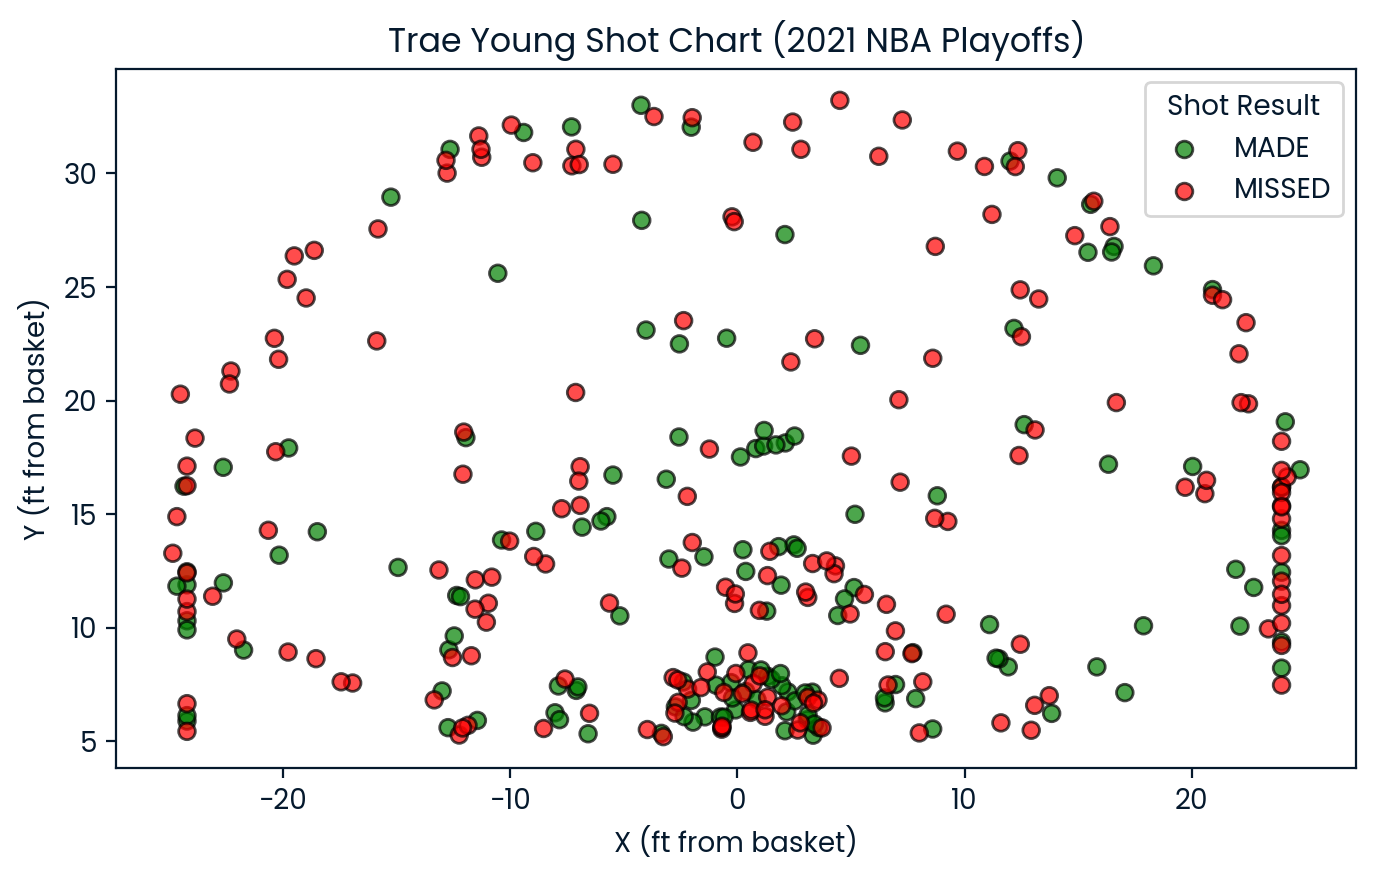

In [5]:
import matplotlib.pyplot as plt

# Filter data for Seth Curry
trae_young_shots = nba[nba['SHOOTER'] == 'Trae Young']

# Set color map for 'MADE' and 'MISSED'
color_map = {'MADE': 'green', 'MISSED': 'red'}
colors = trae_young_shots['SCORE'].map(color_map)

plt.figure(figsize=(8, 7))
plt.scatter(trae_young_shots['X'], trae_young_shots['Y'], c=colors, alpha=0.7, edgecolor='k')

# Add legend
for score, color in color_map.items():
    plt.scatter([], [], c=color, label=score, alpha=0.7, edgecolor='k')
plt.legend(title='Shot Result')

plt.title("Trae Young Shot Chart (2021 NBA Playoffs)")
plt.xlabel("X (ft from basket)")
plt.ylabel("Y (ft from basket)")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

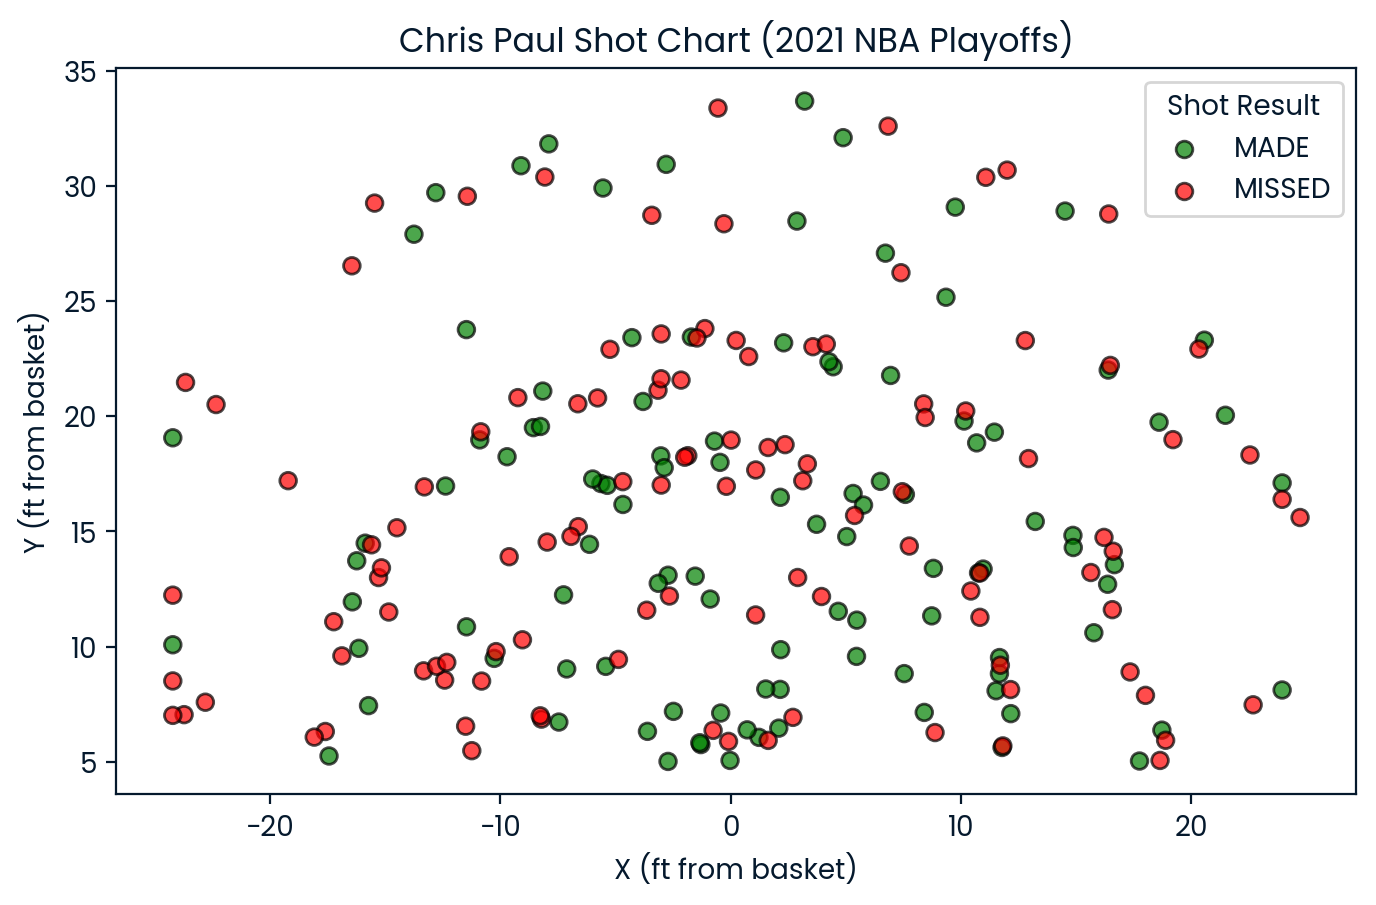

In [6]:
import matplotlib.pyplot as plt

# Filter data for Seth Curry
chris_paul_shots = nba[nba['SHOOTER'] == 'Chris Paul']

# Set color map for 'MADE' and 'MISSED'
color_map = {'MADE': 'green', 'MISSED': 'red'}
colors = chris_paul_shots['SCORE'].map(color_map)

plt.figure(figsize=(8, 7))
plt.scatter(chris_paul_shots['X'], chris_paul_shots['Y'], c=colors, alpha=0.7, edgecolor='k')

# Add legend
for score, color in color_map.items():
    plt.scatter([], [], c=color, label=score, alpha=0.7, edgecolor='k')
plt.legend(title='Shot Result')

plt.title("Chris Paul Shot Chart (2021 NBA Playoffs)")
plt.xlabel("X (ft from basket)")
plt.ylabel("Y (ft from basket)")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

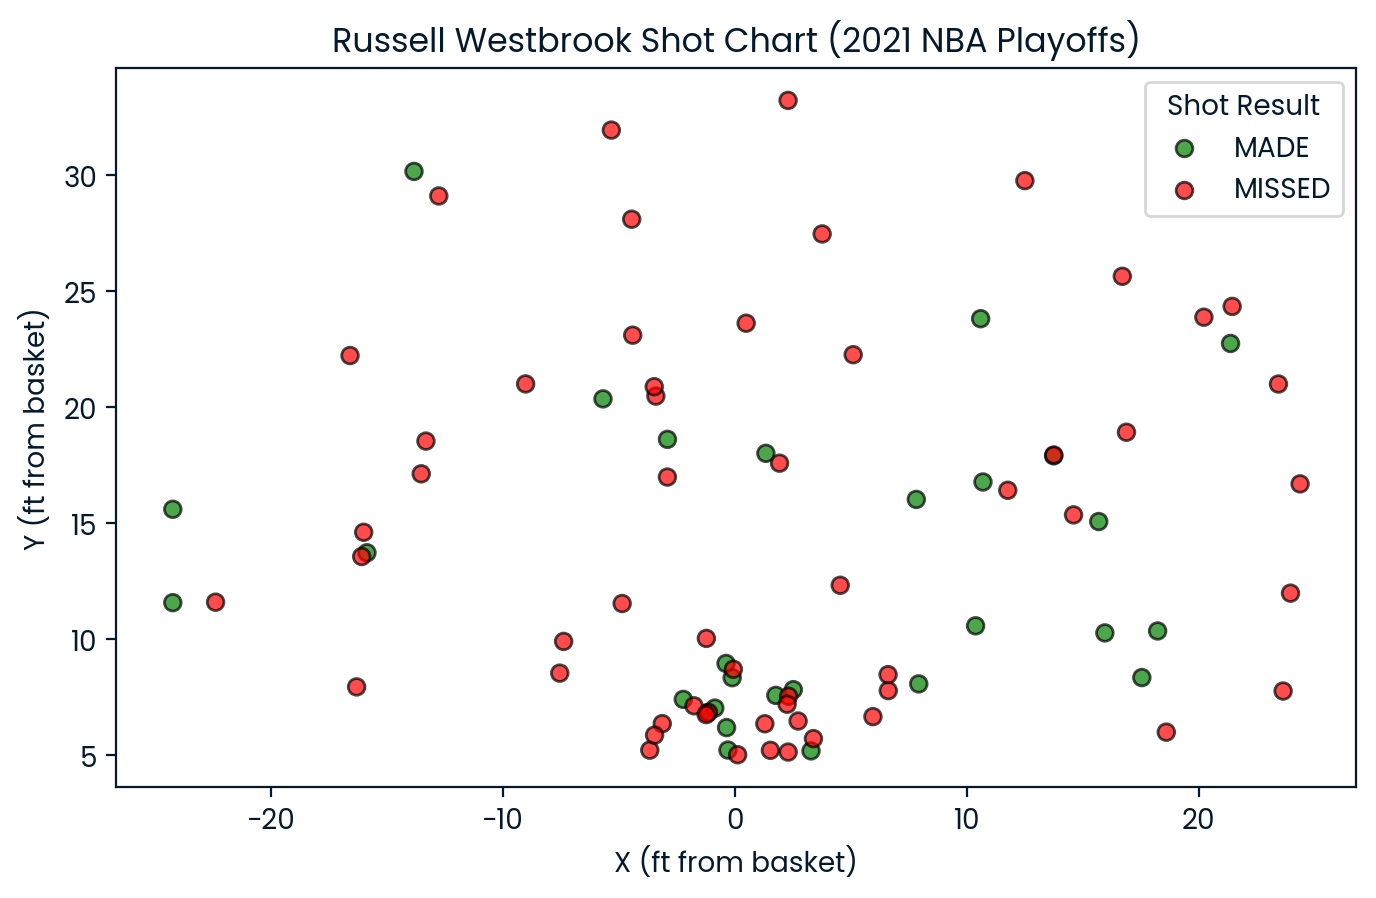

In [7]:
import matplotlib.pyplot as plt

# Filter data for Seth Curry
Russell_Westbrook_shots = nba[nba['SHOOTER'] == 'Russell Westbrook']

# Set color map for 'MADE' and 'MISSED'
color_map = {'MADE': 'green', 'MISSED': 'red'}
colors = Russell_Westbrook_shots['SCORE'].map(color_map)

plt.figure(figsize=(8, 7))
plt.scatter(Russell_Westbrook_shots['X'], Russell_Westbrook_shots['Y'], c=colors, alpha=0.7, edgecolor='k')

# Add legend
for score, color in color_map.items():
    plt.scatter([], [], c=color, label=score, alpha=0.7, edgecolor='k')
plt.legend(title='Shot Result')

plt.title("Russell Westbrook Shot Chart (2021 NBA Playoffs)")
plt.xlabel("X (ft from basket)")
plt.ylabel("Y (ft from basket)")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The second set of visualizations consists of individual player shot charts, which break down the “range” component spatially for each player, showing where on the court they prefer to shoot and their success from those locations. Chris Paul demonstrates a heavy concentration of shots in the mid-range, particularly around the right elbow and free-throw line, with a balanced mix of makes (green) and misses (red). Trae Young exhibits a highly analytics-driven shot selection, with a large volume of attempts either directly at the rim (floaters and layups) or from deep three-point range, leaving very few shots in between. Russell Westbrook also has a high volume at the rim but takes a notable number of mid-range shots (right side), which appear less efficient as indicated by many red dots in the 10–20 foot range. Seth Curry shows a highly specialized pattern, taking almost exclusively three-pointers or shots at the rim, leaving the mid-range almost empty. Scatter plots were chosen for these visualizations because they are the only chart type that can map two quantitative variables, X and Y coordinates onto a two-dimensional plane, accurately representing the physical locations of shots on the court. Color encoding to distinguish shot results (made vs. missed) is critical: green indicates successful shots and red indicates misses, allowing the audience to instantly and intuitively differentiate outcomes. Using alternative visual encodings, such as shapes, would be less effective, as it would create additional visual clutter and reduce immediate interpretability.

## Avenue 3: Aggregated Efficiency by Player and Ranges

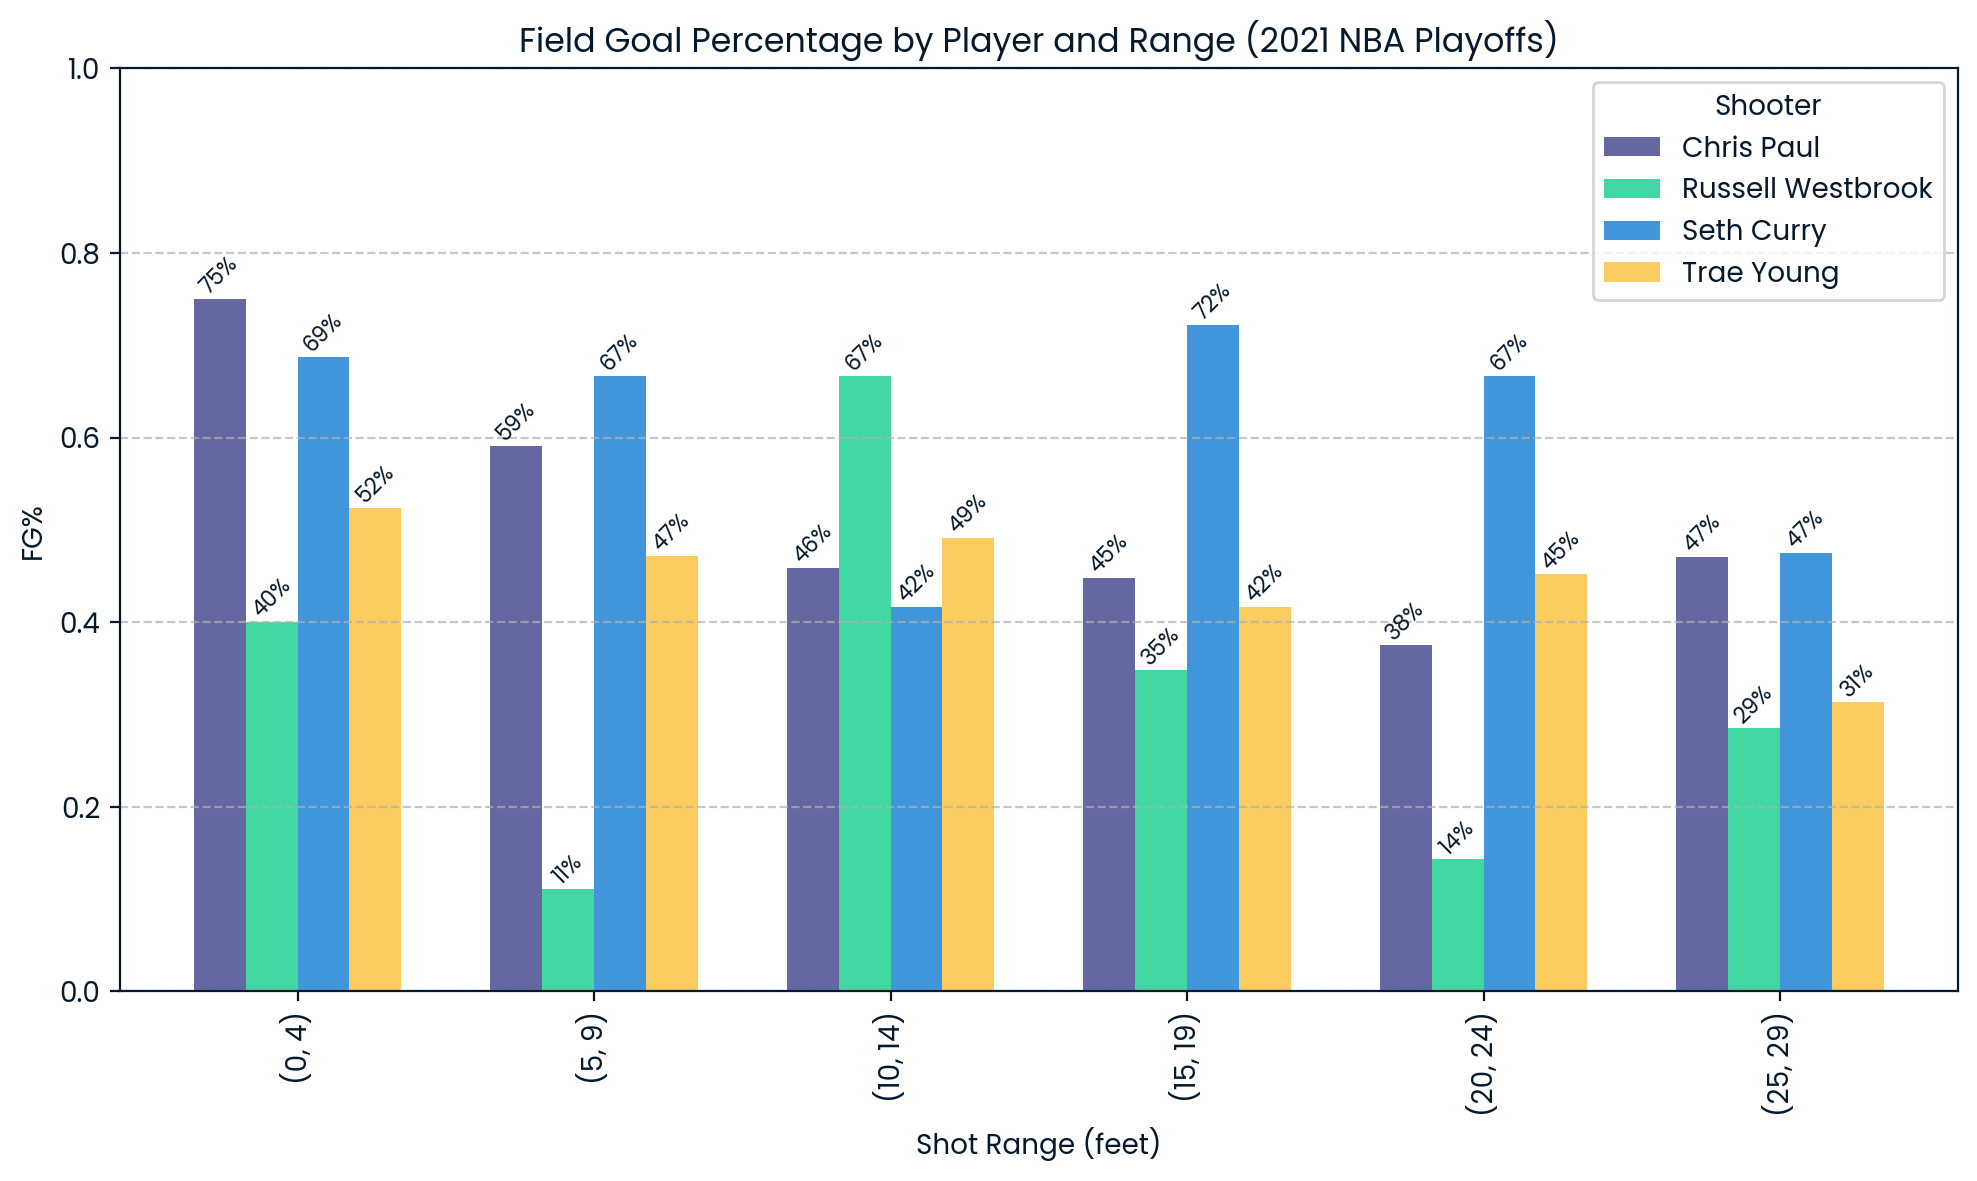

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Compute shooting percentage (FG%) by player and range ---
nba['MadeFlag'] = nba['SCORE'].apply(lambda x: 1 if x.upper() == 'MADE' else 0)

# Define the correct order of your range bins
range_order = ['(0, 4)', '(5, 9)', '(10, 14)', '(15, 19)', '(20, 24)', '(25, 29)']

# Convert RANGE column to an ordered categorical type
nba['RANGE'] = pd.Categorical(nba['RANGE'], categories=range_order, ordered=True)

# --- Group and compute FG% ---
fg_percent = nba.groupby(['SHOOTER', 'RANGE'])['MadeFlag'].mean().reset_index()

# --- Pivot data for easier plotting ---
fg_pivot = fg_percent.pivot(index='RANGE', columns='SHOOTER', values='MadeFlag')

# --- Plot ---
ax = fg_pivot.plot(kind='bar', figsize=(10,6), width=0.7)
plt.title('Field Goal Percentage by Player and Range (2021 NBA Playoffs)')
plt.ylabel('FG%')
plt.xlabel('Shot Range (feet)')
plt.ylim(0, 1)
plt.legend(title='Shooter')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v*100:.0f}%' for v in container.datavalues], fmt='%.0f%%',rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


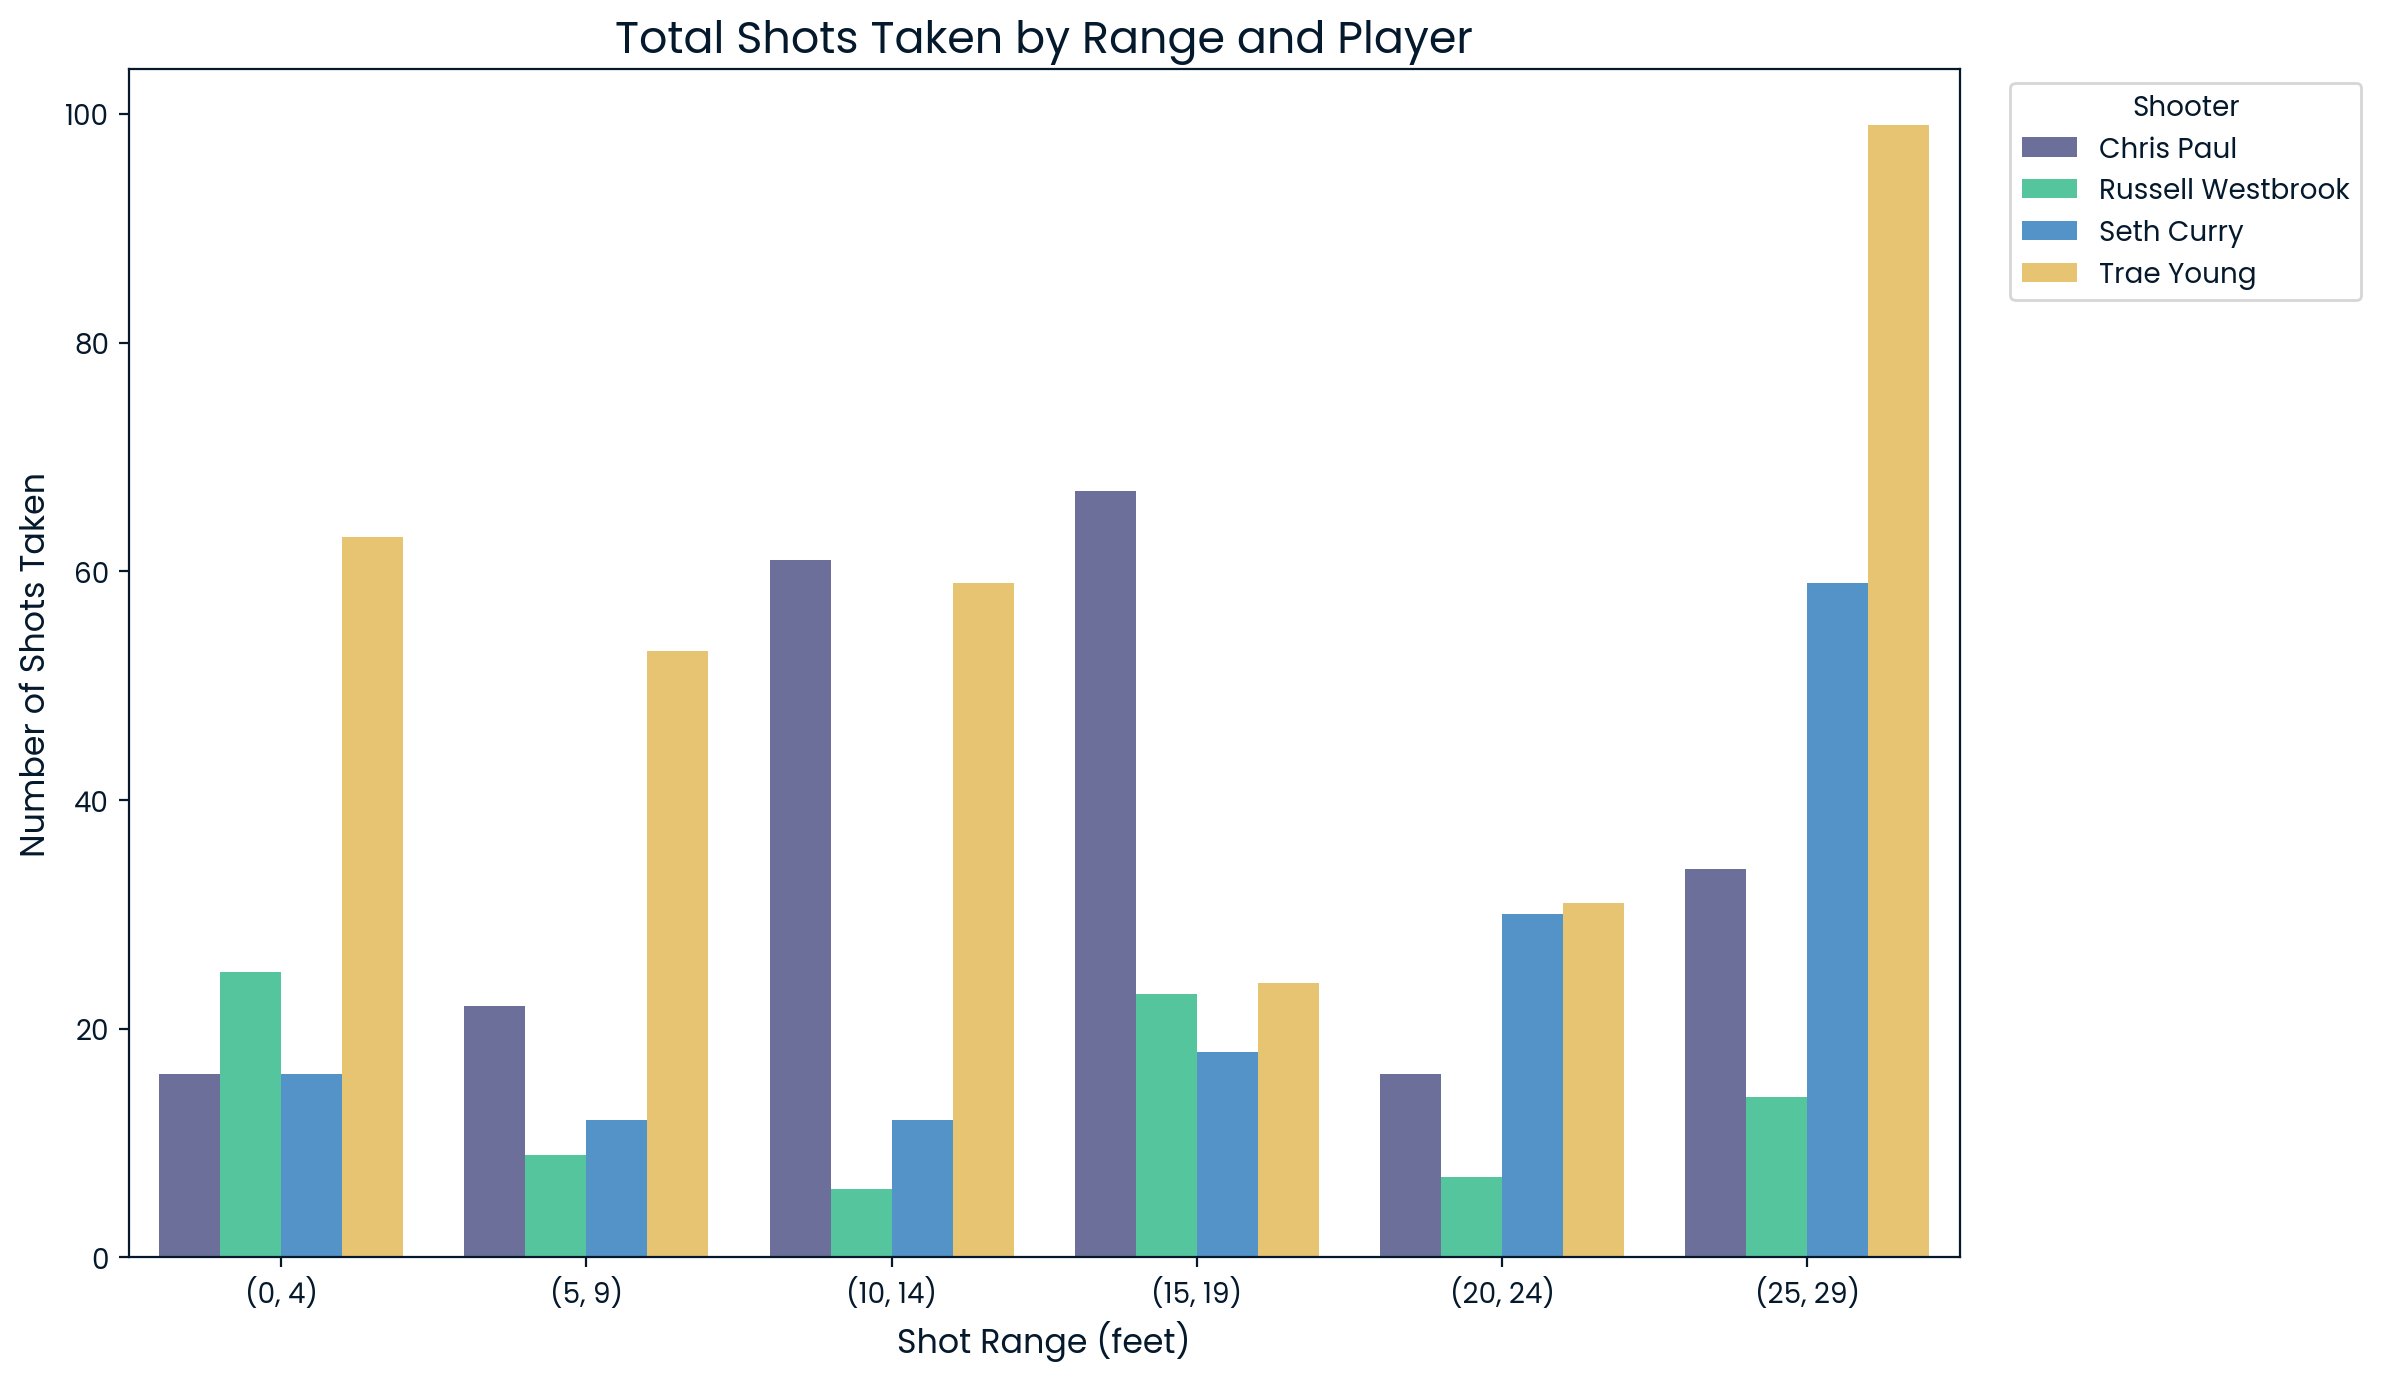

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
# 1. Assume your data is loaded into a DataFrame named 'nba'.
#
# Example (if you were loading from a file):
# nba = pd.read_csv('your_shot_data.csv')
#
# We will proceed assuming 'nba' already exists with your data.

# --- 1. Data Processing ---
# Group the data by both 'SHOOTER' and 'RANGE', then count the
# number of occurrences (shots) in each group using .size().
# .reset_index() converts the result back into a flat DataFrame
# and we name the new count column 'SHOT_COUNT'.
try:
    shot_counts = nba.groupby(['SHOOTER', 'RANGE']).size().reset_index(name='SHOT_COUNT')

    # --- 2. Visualization ---
    # We will create a grouped bar chart to show the counts.
    # 
    
    # Set the size of the plot
    plt.figure(figsize=(12, 7))

    # Create the grouped bar plot using seaborn
    # - x='RANGE' puts the shot range on the x-axis.
    # - y='SHOT_COUNT' sets the height of the bars based on our count.
    # - hue='SHOOTER' creates separate, colored bars for each player, grouped by range.
    sns.barplot(data=shot_counts, x='RANGE', y='SHOT_COUNT', hue='SHOOTER')

    # Add titles and labels for clarity
    plt.title('Total Shots Taken by Range and Player', fontsize=16)
    plt.xlabel('Shot Range (feet)', fontsize=12)
    plt.ylabel('Number of Shots Taken', fontsize=12)
    
    # Move the legend outside the plot area for better readability
    plt.legend(title='Shooter', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Adjust layout to prevent labels from being cut off
    plt.tight_layout()

    # Display the plot
    plt.show()

except NameError:
    print("Error: The DataFrame 'nba' is not defined.")
    print("Please make sure your data is loaded into a DataFrame named 'nba'.")
except KeyError as e:
    print(f"Error: Missing expected column {e}.")
    print("Please ensure your DataFrame has 'SHOOTER' and 'RANGE' columns.")


Analysis: The purpose of the first bar graph is to display how a different range affects how probable the player is to make the shot. Chris Paul is most likely to score from the 0 to 4 feet range and least likely to score from the 20 to 24 feet range. Russell Westbrook is most likely to score from the 10 to 14 feet range and least likely to score from the 5 to 9 feet range. Seth Curry is most likely to score from the 15 to 19 feet range and least likely to score from the 25 to 29 feet range. Trae Young is most likely to score from the 0 to 4 feet range and least likely to score from the 25 to 29 feet range. There are limitations to this bar graph as it doesn't display the amount of shots taken by each player from that range, only the percentages. This is important as it doesn't reveal all of the context behind why some percentage might be lower or higher than what they should actually be since a smaller sample size are more likely to have a skewed result compared to larger sample sizes. This is the part of the purpose of the second bar graph, to provide context to the percentages in the first graph. The main purpose is to reveals whether the players were taking the most shots from the ranges they were most efficient from. Chris Paul took the most shots from the 15 to 19 feet range, even though he was most efficient from the 0 to 4 feet range. Russell Westbrook took the most shots from the 0 to 4 feet range, even though he's most likely to score from the 10 to 14 feet range. Seth Curry took the most shots from the the 25-29 feet range, even though he's most likely to score from the 15 to 19 feet range. Trae Young took the most shots from the the 25-29 feet range, even though he's most likely to score from the 0 to 4 feet range. None of them took the most shots from the range they were most efficient. A bar graph was used because it makes comparisons of quantitative data between different values of the same category intuitive to understand. In this case, the quantitative data we are comparing are field goal percentages and total shots taken.

## Avenue 4: Shot Outcome Probability vs. Distance

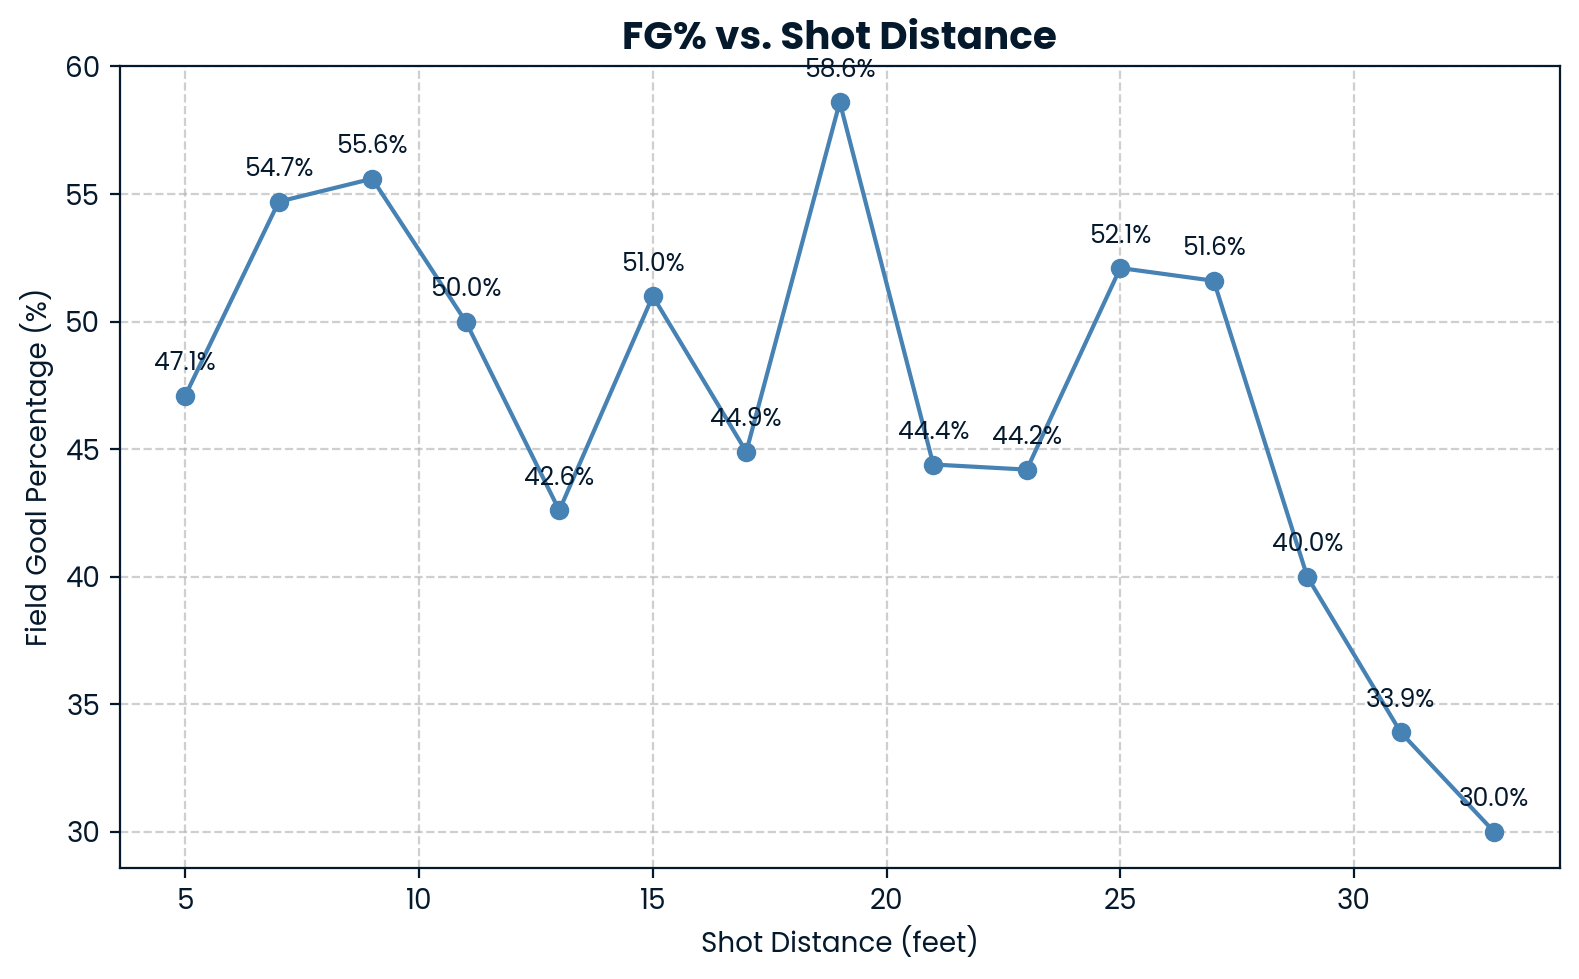

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load Data ---
try:
    nba = pd.read_csv("nba_players_shooting.csv", index_col=0)
except FileNotFoundError:
    print("Error: 'nba_players_shooting.csv' not found.")
    exit()

# Convert MADE/MISSED to numerical flag
nba['MadeFlag'] = nba['SCORE'].apply(lambda x: 1 if x.upper() == 'MADE' else 0)

# --- 2. Compute Shot Distance ---
nba['Distance'] = np.sqrt(nba['X']**2 + nba['Y']**2)

# --- 3. Bin distances (e.g., every 2 feet) ---
bin_edges = np.arange(0, nba['Distance'].max() + 2, 2)  # 0,2,4,...
nba['DistanceBin'] = pd.cut(nba['Distance'], bins=bin_edges)

# --- 4. Compute mean FG% per distance bin ---
fg_by_distance = nba.groupby('DistanceBin').agg(
    Mean_FG=('MadeFlag', 'mean'),
    Attempts=('MadeFlag', 'count')
).reset_index()
fg_by_distance['Mean_FG_Display'] = (fg_by_distance['Mean_FG'] * 100).round(1)

# --- 5. Plot FG% vs Distance ---
plt.figure(figsize=(8,5))
plt.plot(
    [interval.mid for interval in fg_by_distance['DistanceBin']],
    fg_by_distance['Mean_FG_Display'],
    marker='o', linestyle='-', color='steelblue'
)
plt.title("FG% vs. Shot Distance", fontsize=14, fontweight='bold')
plt.xlabel("Shot Distance (feet)")
plt.ylabel("Field Goal Percentage (%)")
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate each point with FG%
for x, y in zip([interval.mid for interval in fg_by_distance['DistanceBin']], fg_by_distance['Mean_FG_Display']):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


The fourth visualization examines field goal percentage as a function of shot distance, transitioning from the discrete “ranges” used in the first visualization to a continuous view that captures the impact of distance on shooting efficiency. The plot displays aggregate FG% at one-foot increments, revealing that overall efficiency decreases as distance increases. Notable patterns emerge, including a significant dip at 12 feet (42.6%), corresponding to the notoriously inefficient “long-two” area, and a peak at 19 feet (58.6%), likely influenced by a high-volume mid-range shooter in the dataset, such as Chris Paul, who is particularly effective from that spot. A sharp drop-off beyond 27 feet—from 40.0% to 30.0%—reflects the difficulty of very deep three-point shots. A line graph was chosen for this visualization because it effectively displays the relationship between two quantitative variables (shot distance and FG%), connecting points to highlight trends, peaks, and valleys in efficiency. A limitation of this visualization is that it aggregates all four players, so the 19-foot peak is likely driven by one specialist (Chris Paul) and may not be representative of the other players. This could be improved by faceting the plot into four smaller line graphs, one for each player, to observe whether their individual distance-efficiency curves differ.

## Avenue 5: FG% vs. Defenders

[Source](https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Playoffs&PerMode=Totals) of dataset.

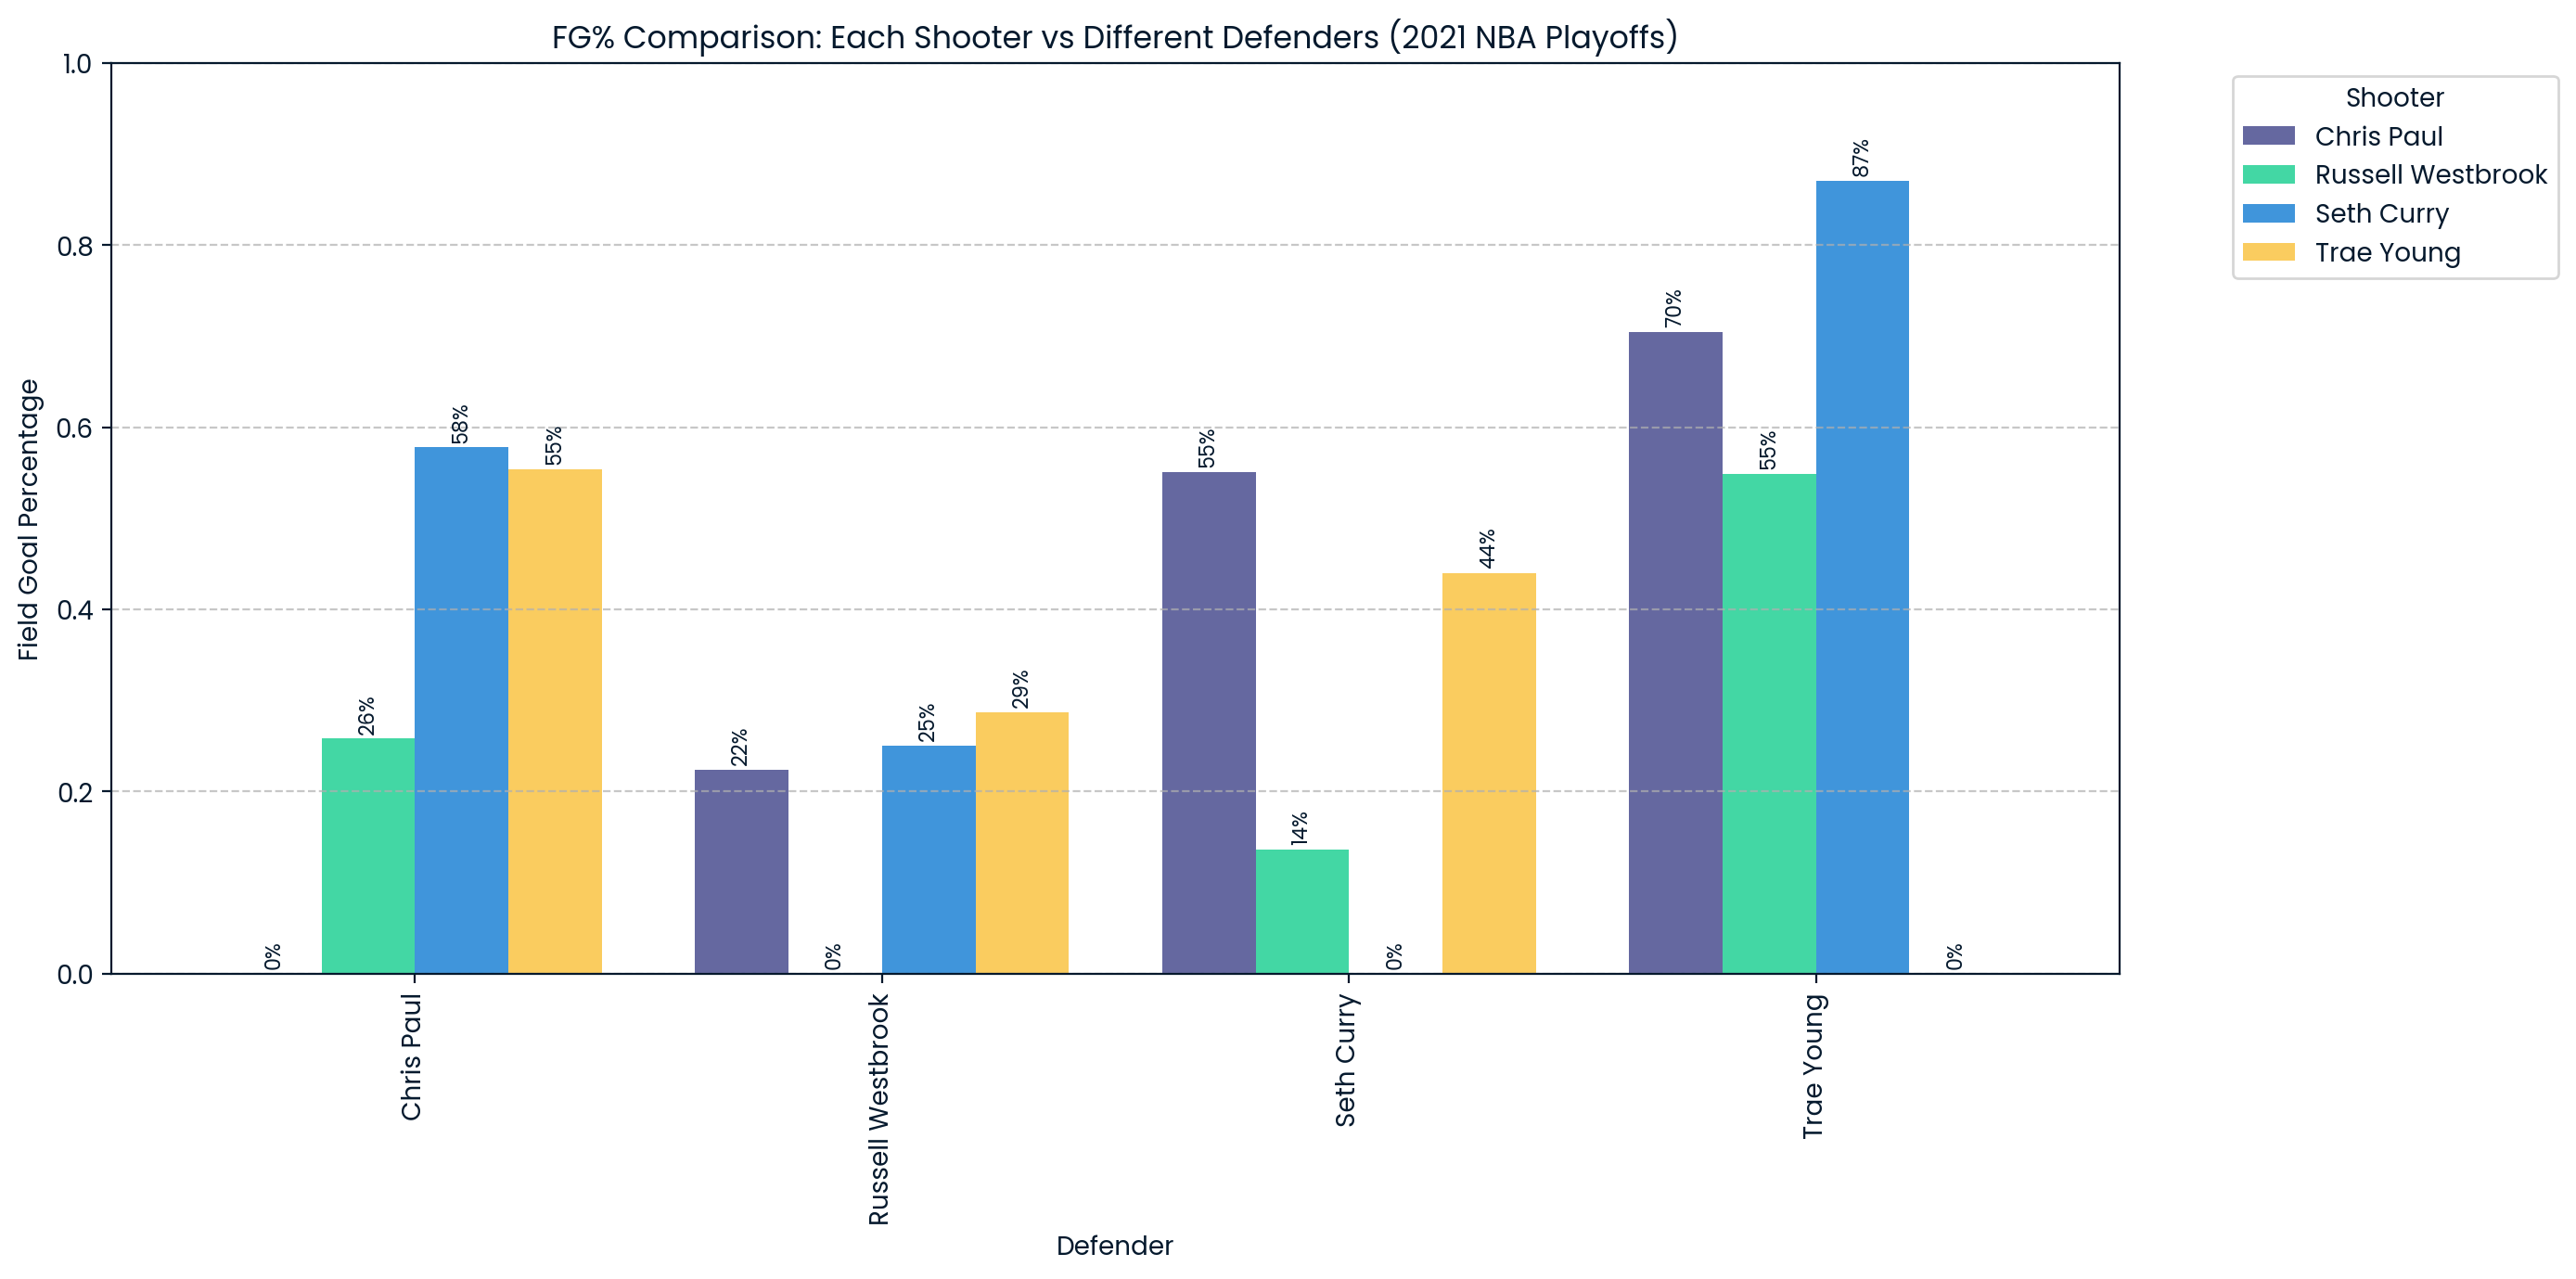

In [11]:
# --- Compute FG% by shooter and defender using 'Defender' column ---
# Create a new DataFrame to avoid modifying the original nba DataFrame
nba_shooter_defender = nba.copy()

# Group by shooter and defender, calculate FG%
fg_by_defender = nba_shooter_defender.groupby(['SHOOTER', 'DEFENDER'])['MadeFlag'].mean().reset_index()

# Pivot for grouped bar plot: rows=Defender, columns=Shooter, values=FG%
fg_by_defender_pivot = fg_by_defender.pivot(index='DEFENDER', columns='SHOOTER', values='MadeFlag')

# --- Plot grouped bar chart to compare shooters against defenders ---
fig, ax = plt.subplots(figsize=(14, 7))

fg_by_defender_pivot.plot(kind='bar', ax=ax, width=0.8)
plt.title('FG% Comparison: Each Shooter vs Different Defenders (2021 NBA Playoffs)')
plt.ylabel('Field Goal Percentage')
plt.xlabel('Defender')
plt.ylim(0, 1)
plt.legend(title='Shooter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with FG% values
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v*100:.0f}%' if not pd.isna(v) else '' for v in container.datavalues], fontsize=8, rotation=90, padding=2)

plt.tight_layout()
plt.show()

The fifth visualization provides a comprehensive comparison of field goal percentage by combining both key variables: shooters and defenders. In this grouped bar chart, the X-axis represents the defender, and the colored bars within each group show how each of the four shooters performed against that specific defender. The chart shows that Chris Paul performs worst against Russell Westbrook, scoring only 25% of his shots compared to 55–58% against other defenders. Russell Westbrook struggles across most matchups, while Seth Curry performs well except against Westbrook, where his success rate drops to 14%. Trae Young consistently maintains high efficiency across defenders, with FG% values between 55% and 87%. The grouped bar chart was chosen because it allows comparison across two categorical variables (Shooter and Defender), and color encoding distinguishes shooters clearly via the legend. A noted limitation is that percentages do not account for shot volume, which could misrepresent performance if sample sizes are small. Therefore, for future analyses, confidence intervals could be added or include shot counts for greater accuracy. The analysis is limited to data from only four players during a single playoff run, so conclusions like “Trae Young is a poor defender” would apply only within this small sample and cannot be generalized to the entire league. Future work could integrate all three variables—shooter, range, and defender—to examine how a player’s FG% from different ranges changes depending on the defender, using a heatmap or faceted bar charts to reveal more detailed patterns.

# 3. Player Recommendation

**Chris Paul:** Excels in mid-range areas but struggles against Russell Westbrook (25% FG%). He should avoid contested mid-range shots against Westbrook, drive to the rim when possible, and limit deep three-pointers beyond 25 feet unless open.

**Russell Westbrook:** High efficiency at the rim but low mid-range success. He should focus on layups and floaters, reduce contested mid-range shots, and use off-ball movement or pick-and-rolls to create open opportunities.

**Seth Curry:** Specializes in three-pointers and rim shots, struggling against Westbrook (14% FG%). He should maintain his shot selection, use screens or off-ball movement to create open shots, and practice deep threes for consistency.

**Trae Young:** Strong across all defenders with high efficiency at the rim and deep three-pointers. He should continue prioritizing these zones and leverage his ability to draw defenders to create open shots for teammates.

# 4. Conclusion
Shooting performance is influenced by both distance and defensive pressure. Efficiency is highest at the rim and declines with distance, while defenders like Russell Westbrook reduce FG%, and Trae Young allows higher success. Visualizations of shot location, FG% by distance, and defender comparisons revealed player tendencies and informed targeted recommendations. Proper analysis of these visualizations and data provides us with actionable insights for improving shot selection and exploiting matchups.


-------------------
Predictive Accuracy
-------------------
Test Accuracy: 0.6538461538461539
Test ROC AUC: 0.7276785714285714

-------------------
10-Fold Cross-Validation
-------------------
Mean CV ROC AUC: 0.705099181062824
Std CV ROC AUC: 0.06623950705499634

-------------------
Bootstrap Coefficient CIs
-------------------
                       feature  coef_mean  ci_lower  ci_upper
0                            X   0.142133 -0.026357  0.324198
1                            Y  -0.151848 -0.375644  0.064652
2    SHOOTER_Russell Westbrook  -0.949166 -1.515689 -0.354459
3           SHOOTER_Seth Curry   0.545558  0.037795  1.087511
4           SHOOTER_Trae Young   0.171821 -0.277760  0.618615
5   DEFENDER_Russell Westbrook  -1.208947 -1.662755 -0.772893
6          DEFENDER_Seth Curry  -0.296979 -0.759620  0.147967
7          DEFENDER_Trae Young   1.010918  0.509351  1.548769
8               RANGE_(10, 14)  -0.174619 -0.651456  0.328545
9               RANGE_(15, 19)  -0.048104 -0.597

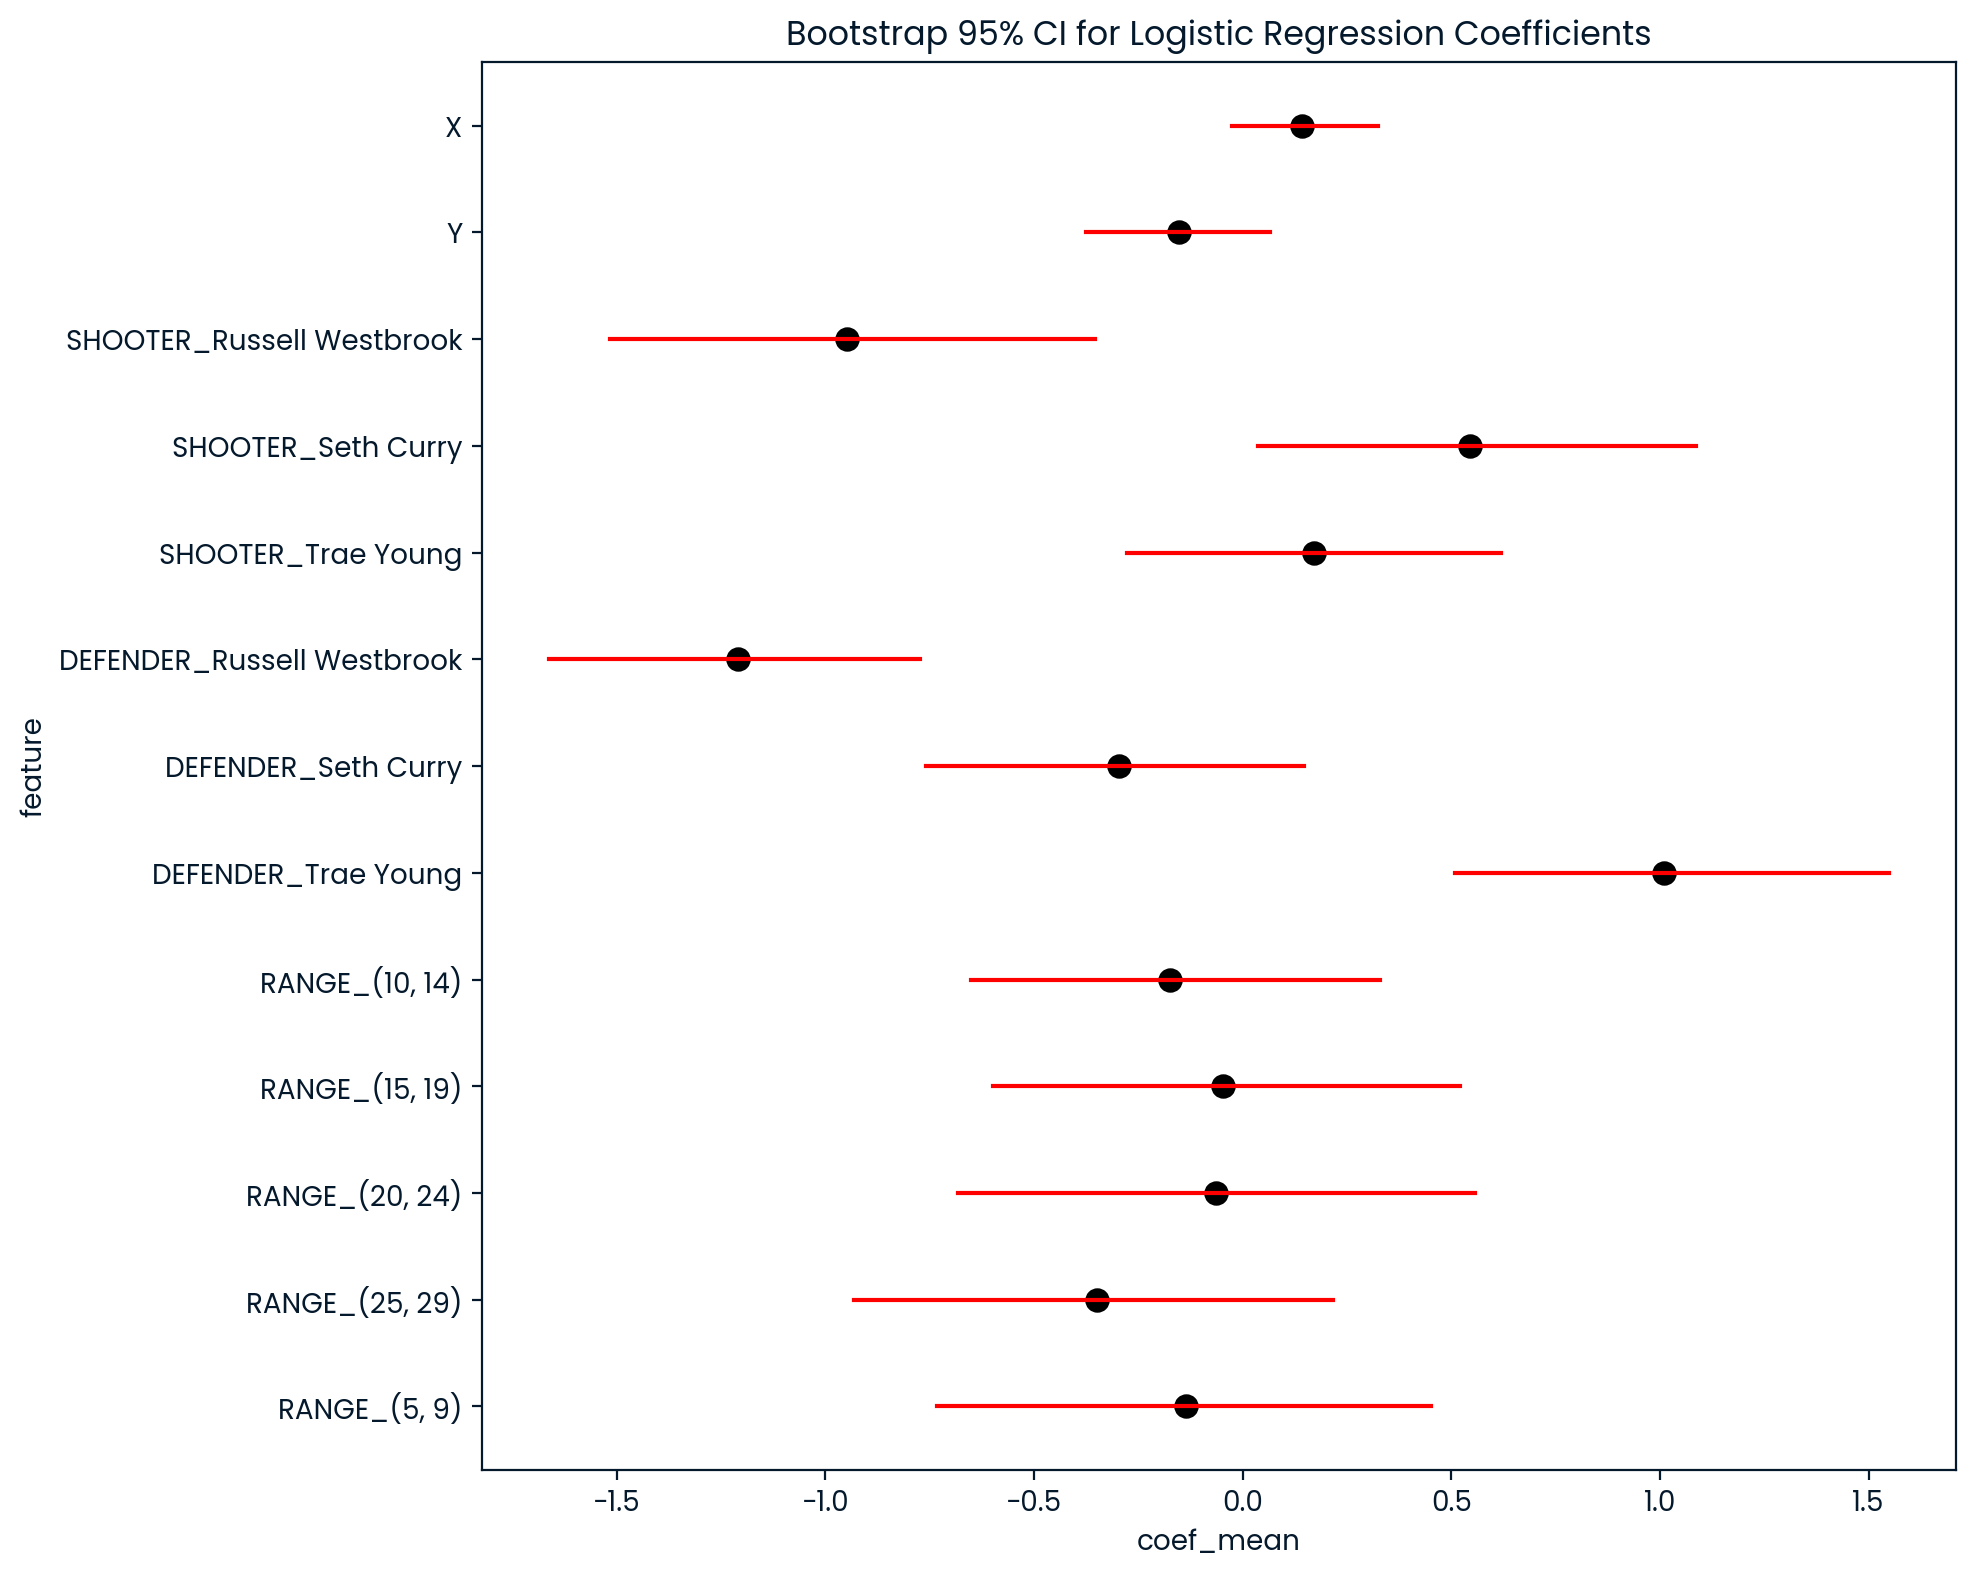

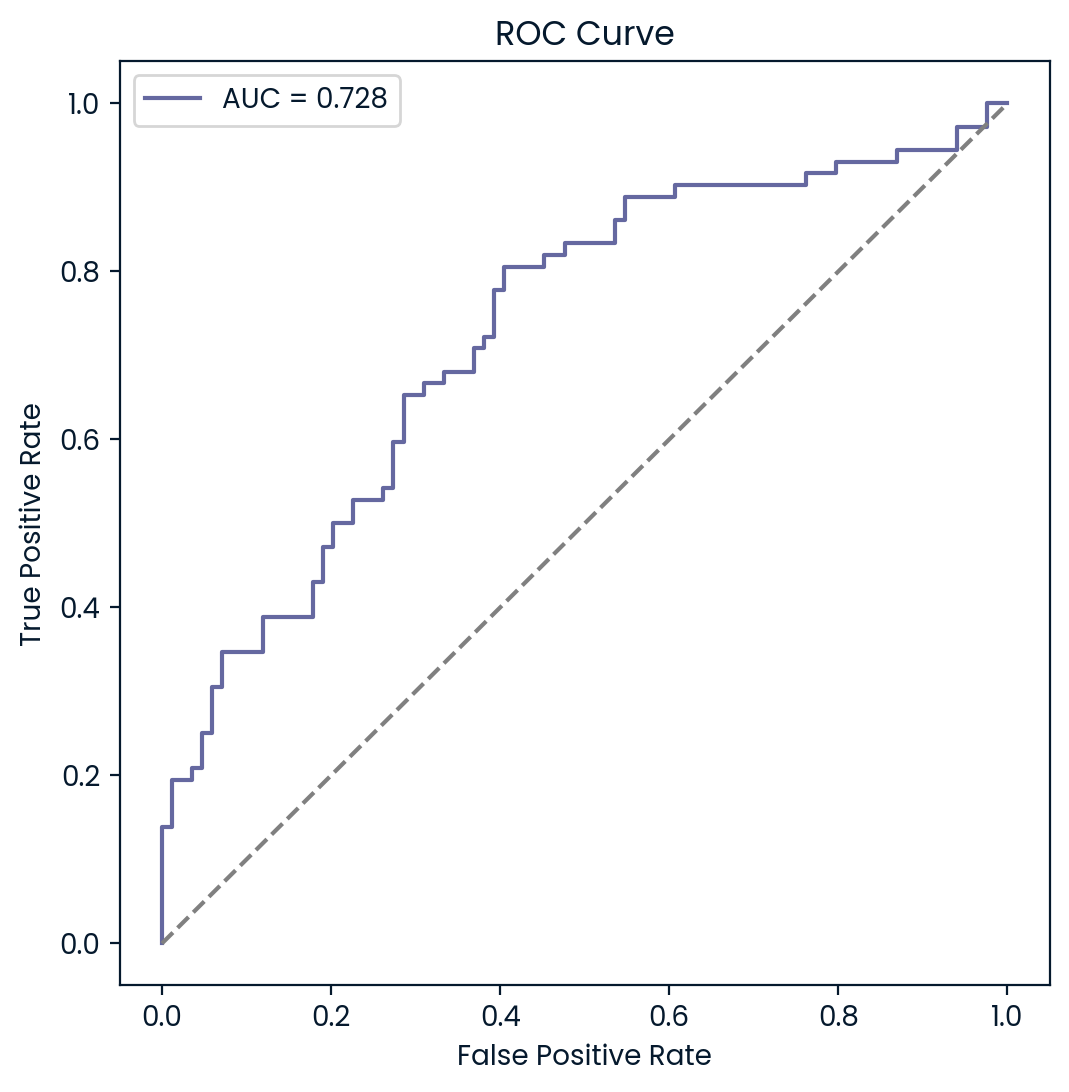

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------
# 1. Load Data
# -----------------------------------------------------------
df = pd.read_csv("nba_players_shooting.csv")

# -----------------------------------------------------------
# 2. Feature-Specific Handling of Missingness
# -----------------------------------------------------------

# X,Y (numeric):
# → impute missing coords with column median
df["X"] = df["X"].fillna(df["X"].median())
df["Y"] = df["Y"].fillna(df["Y"].median())

# Categorical vars:
# SHOOTER, DEFENDER, RANGE
# → impute missing values with "Unknown"
categorical_cols = ["SHOOTER", "DEFENDER", "RANGE"]
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

# Target: SCORE
# Convert to 0/1
df["shot_made"] = df["SCORE"].map({"MADE": 1, "MISSED": 0})
# If SCORE is missing, drop those (only feature allowed to drop)
df = df.dropna(subset=["shot_made"])

# -----------------------------------------------------------
# 3. Build Predictors (after cleaning)
# -----------------------------------------------------------
numeric_cols = ["X", "Y"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df[[c for c in df.columns if c not in ["INDEX", "SCORE", "shot_made"]]]
y = df["shot_made"]

# -----------------------------------------------------------
# 4. Train/Test Split
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------------------------------------
# 5. Standardize numeric columns only
# -----------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# -----------------------------------------------------------
# 6. Fit Logistic Regression
# -----------------------------------------------------------
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("\n-------------------")
print("Predictive Accuracy")
print("-------------------")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------------------------------------
# 7. 10-Fold Cross-Validation (Performance Evaluation)
# -----------------------------------------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_auc = cross_val_score(
    log_reg,
    pd.concat([X_train_scaled, X_test_scaled]),
    pd.concat([y_train, y_test]),
    cv=kf,
    scoring="roc_auc"
)

print("\n-------------------")
print("10-Fold Cross-Validation")
print("-------------------")
print("Mean CV ROC AUC:", cv_auc.mean())
print("Std CV ROC AUC:", cv_auc.std())

# -----------------------------------------------------------
# 8. Bootstrap CI for Coefficients
# -----------------------------------------------------------
n_boot = 3000
coefs = []

for _ in range(n_boot):
    idx = np.random.choice(len(X_train_scaled), size=len(X_train_scaled), replace=True)
    X_b = X_train_scaled.iloc[idx]
    y_b = y_train.iloc[idx]

    model_b = LogisticRegression(max_iter=500)
    model_b.fit(X_b, y_b)
    coefs.append(model_b.coef_[0])

coefs = np.array(coefs)
coef_means = coefs.mean(axis=0)
coef_lower = np.percentile(coefs, 2.5, axis=0)
coef_upper = np.percentile(coefs, 97.5, axis=0)

results = pd.DataFrame({
    "feature": X.columns,
    "coef_mean": coef_means,
    "ci_lower": coef_lower,
    "ci_upper": coef_upper
})

print("\n-------------------")
print("Bootstrap Coefficient CIs")
print("-------------------")
print(results)

# -----------------------------------------------------------
# 9. Plot Bootstrap Confidence Intervals
# -----------------------------------------------------------
plt.figure(figsize=(10, 8))
sns.pointplot(data=results, x="coef_mean", y="feature", join=False, color="black")

for i in range(len(results)):
    plt.plot([results.ci_lower[i], results.ci_upper[i]], [i, i], 'r-')

plt.title("Bootstrap 95% CI for Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# 10. Plot ROC Curve
# -----------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Preview of data:
      SHOOTER         X         Y   RANGE    DEFENDER SCORE
0  Seth Curry -3.808987  5.583621  (0, 4)  Chris Paul  MADE
1  Seth Curry -0.104279  5.919138  (0, 4)  Trae Young  MADE
2  Seth Curry -0.525864  8.912239  (0, 4)  Trae Young  MADE
3  Seth Curry -0.790616  7.503782  (0, 4)  Chris Paul  MADE
4  Seth Curry  2.119074  5.320534  (0, 4)  Trae Young  MADE

Total rows after cleaning: 776


c:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

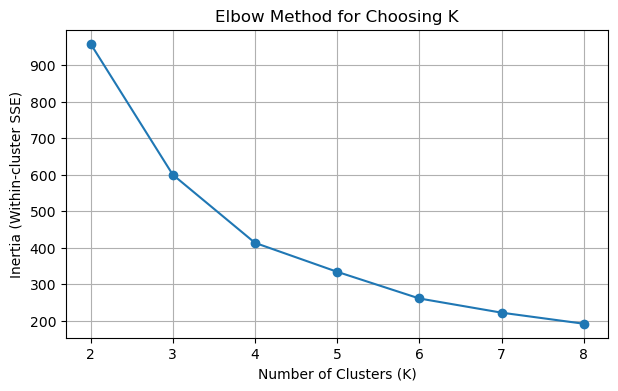

c:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(



Cluster labels assigned. Unique clusters: [0 2 3 1]


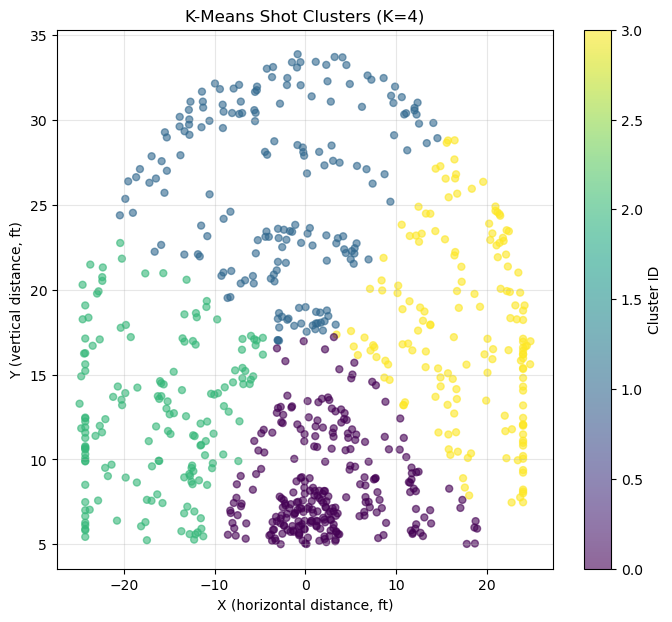


FG% and shot attempts by cluster:
   cluster  shot_attempts  fg_pct
0        0            262   0.527
1        1            185   0.400
2        2            164   0.415
3        3            165   0.485


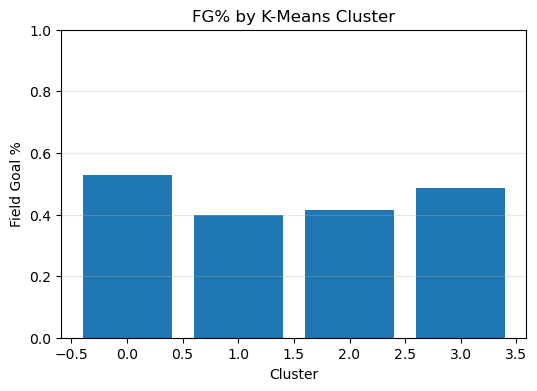


Player-level cluster summary (first 20 rows):
              SHOOTER  cluster  shot_attempts  fg_pct
0          Chris Paul        0             61   0.607
1          Chris Paul        1             61   0.459
2          Chris Paul        2             52   0.365
3          Chris Paul        3             42   0.500
4   Russell Westbrook        0             35   0.343
5   Russell Westbrook        1             19   0.211
6   Russell Westbrook        2             10   0.300
7   Russell Westbrook        3             20   0.450
8          Seth Curry        0             34   0.647
9          Seth Curry        1             44   0.432
10         Seth Curry        2             29   0.586
11         Seth Curry        3             40   0.675
12         Trae Young        0            132   0.508
13         Trae Young        1             61   0.377
14         Trae Young        2             73   0.397
15         Trae Young        3             63   0.365

Cluster stats for Seth Curry:
    

In [2]:
# K-MEANS CLUSTERING FULL PIPELINE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ---------------------------------------------------------------------
# 1. Load data
# ---------------------------------------------------------------------
df = pd.read_csv("nba_players_shooting.csv")

# Binary outcome for convenience
df['is_made'] = (df['SCORE'] == 'MADE').astype(int)

# Drop rows with missing coordinates if any
df = df.dropna(subset=['X', 'Y']).reset_index(drop=True)

print("Preview of data:")
print(df[['SHOOTER', 'X', 'Y', 'RANGE', 'DEFENDER', 'SCORE']].head())
print("\nTotal rows after cleaning:", len(df))

# ---------------------------------------------------------------------
# 2. Prepare features and scale (X, Y only)
# ---------------------------------------------------------------------
shot_xy = df[['X', 'Y']].copy()

scaler = StandardScaler()
shot_xy_scaled = scaler.fit_transform(shot_xy)

# ---------------------------------------------------------------------
# 3. Elbow method to choose K
# ---------------------------------------------------------------------
inertia = []
K_values = range(2, 9)  # try K = 2..8

for k in K_values:
    kmeans_temp = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans_temp.fit(shot_xy_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K_values, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Choosing K")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------
# 4. Fit final K-means model (set K here)
# ---------------------------------------------------------------------
K = 4  # <-- change this if the elbow plot suggests another value

kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)
df['cluster'] = kmeans.fit_predict(shot_xy_scaled)

print("\nCluster labels assigned. Unique clusters:", df['cluster'].unique())

# ---------------------------------------------------------------------
# 5. Visualize clusters on the court
# ---------------------------------------------------------------------
plt.figure(figsize=(8, 7))
scatter = plt.scatter(df['X'], df['Y'], c=df['cluster'],
                      cmap='viridis', alpha=0.6, s=25)
plt.colorbar(scatter, label="Cluster ID")
plt.xlabel("X (horizontal distance, ft)")
plt.ylabel("Y (vertical distance, ft)")
plt.title(f"K-Means Shot Clusters (K={K})")
plt.grid(True, alpha=0.3)
plt.show()

# ---------------------------------------------------------------------
# 6. FG% and volume by cluster
# ---------------------------------------------------------------------
cluster_summary = df.groupby('cluster')['is_made'].agg(
    shot_attempts='count',
    fg_pct='mean'
).reset_index()

cluster_summary['fg_pct'] = cluster_summary['fg_pct'].round(3)

print("\nFG% and shot attempts by cluster:")
print(cluster_summary)

plt.figure(figsize=(6, 4))
plt.bar(cluster_summary['cluster'], cluster_summary['fg_pct'])
plt.xlabel("Cluster")
plt.ylabel("Field Goal %")
plt.title("FG% by K-Means Cluster")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

# ---------------------------------------------------------------------
# 7. Player tendencies by cluster (optional summary)
# ---------------------------------------------------------------------
player_cluster = (
    df.groupby(['SHOOTER', 'cluster'])['is_made']
      .agg(shot_attempts='count', fg_pct='mean')
      .reset_index()
)

player_cluster['fg_pct'] = player_cluster['fg_pct'].round(3)

print("\nPlayer-level cluster summary (first 20 rows):")
print(player_cluster.head(20))

# Example: show one player’s distribution by cluster
example_player = "Seth Curry"  # change to any name in SHOOTER column
print(f"\nCluster stats for {example_player}:")
print(player_cluster[player_cluster['SHOOTER'] == example_player])
